#Grupo 25 - Entregable IAA

#Parte 2 de 2

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1) Los datos del dataset contienen información sobre créditos hipotecarios que se les otorgó a ciertas personas, junto con su historial crediticio.

2) La variable objetivo sería el TARGET, que hace referencia a si se pagó o no el préstamo. Vale 0 cuando el cliente pagó el préstamo, y 1 cuando no.

3) Los atributos disponibles son los siguientes:

* 'LOAN' (préstamo): Monto de la solicitud de préstamo  
* 'MORTDUE': Monto adeudado de la hipoteca existente
* 'VALUE': Valor de la propiedad actual
* 'YOJ': Años en el trabajo actual
* 'DEROG': Número de reportes derogados
* 'DELINQ': Número de créditos adeudados
* 'CLAGE': Antigüedad de la línea de crédito más antigua (en meses)
* 'NINQ': Número de líneas de crédito recientes
* 'CLNO': Número de líneas de crédito
* 'DEBTINC': Relación deuda-ingresos



4) Creemos que los atributos más determinantes podrían ser DEROG, DELINQ, DEBTINC y MORTDUE. Elegimos la variable DEROG porque asumimos que hubo un estudio previo para derogarle prestamos. DELINQ fue escogida porque influye de manera negativa en próximos pagos. Elegimos DEBTINC porque imaginamos que existe una correlación positiva entre ingresos y posibilidad de pago-deuda. Consideramos que MORTDUE es un atributo importante debido a que quizas cuanto menos deuda tenga, menos probabilidad de pago del prestamo.   

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

**Evaluar sobre el conjunto de entrenamiento (train)**

In [ ]:
clf = SGDClassifier(random_state= 100)
scaler = StandardScaler()
model = make_pipeline(scaler, clf)
model = model.fit(X_train, y_train)

Resultados para conjunto de train 

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      1232
           1       0.80      0.30      0.43       251

    accuracy                           0.87      1483
   macro avg       0.84      0.64      0.68      1483
weighted avg       0.86      0.87      0.84      1483



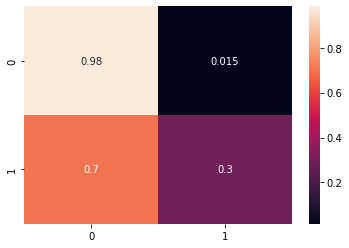

In [ ]:
y_pred_train = model.predict(X_train)
cm= confusion_matrix(y_train, y_pred_train)
print('Resultados para conjunto de train \n')
print(classification_report(y_train, y_pred_train))

sns.heatmap(confusion_matrix(y_train, y_pred_train, normalize = 'true'), annot= True)

 Para los datos de entrenamiento observamos que: 

*   El accuracy es de 87%. 
*   La precisión de clientes deudores (1) es de 80%.
*   La precisión de clientes que pagan en termino (0) es de 87%.
*   El recall de clientes deudores (1) es de 30%. 
*   El recall de clientes que pagan en término (0) es de 98%.
*   El F1-score de clientes deudores (1) es de 43%. 
*   El F1-score de clientes que pagan en término (0) es de 93%.

Consideramos más importante la optimización de recall de los clientes deudores  para identificar la mayor cantidad de dichos clientes, debido a que interpretamos que la empresa  tiene este objetivo.  



**Evaluar sobre el conjunto de evaluación (test)**

Resultados para conjunto de test 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.85      0.29      0.44        58

    accuracy                           0.88       371
   macro avg       0.87      0.64      0.68       371
weighted avg       0.88      0.88      0.86       371



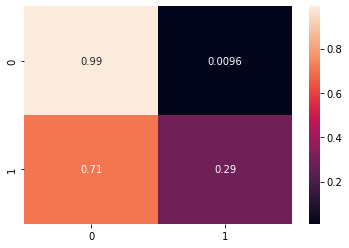

In [ ]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot= True)
print('Resultados para conjunto de test \n')
print(classification_report(y_test, y_pred))

 Para los datos de evaluación observamos que: 

*   El accuracy es de 88% (muy semejante al accuracy del conjunto de entrenamiento; 87%).    
*   La precisión de clientes deudores (1) es de 85% (es levemente mayor al valor obtenido en el caso anterior; 80%).
*   La precisión de clientes que pagan en termino (0) es de 88% (se asemeja al valor obtenido en el conjunto de entrenamiento; 87%).
*   El recall de clientes deudores (1) es de 29% (este valor es similar al obtenido anteriormente; 30%). 
*   El recall de clientes que pagan en término (0) es de 99% (esta métrica es similar al anterior; 98%).
*   El F1-score de clientes deudores (1) es de 44% (similar al caso anterior; 43%). 
*   El F1-score de clientes que pagan en término (0) es de 93% (mismo valor que en la etapa anterior; 93%).

Con estos resultados podemos ver que no se identifica overfitting. Sin embargo, debemos trabajar para mejorar el modelo con el fin de obtener un mejor recall de los clientes deudores.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = {
    'sgdclassifier__loss': ['hinge', 'log', 'perceptron'],
    'sgdclassifier__alpha': [0.001, 0.0001, 0.00001],
    'sgdclassifier__penalty': ['l2','l1','elasticnet'],
    'sgdclassifier__class_weight' : ['balanced']
}

cv = GridSearchCV(model, param_grid, scoring='recall', cv=5)
cv.fit(X_train, y_train)

results = cv.cv_results_
df = pd.DataFrame(results)

df[['param_sgdclassifier__loss', 'param_sgdclassifier__alpha', 'param_sgdclassifier__penalty', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_sgdclassifier__loss,param_sgdclassifier__alpha,param_sgdclassifier__penalty,mean_test_score,std_test_score,rank_test_score
5,log,0.001,elasticnet,0.721333,0.060722,1
4,log,0.001,l1,0.709333,0.075731,2
25,perceptron,0.00001,l1,0.705412,0.079318,3
11,hinge,0.0001,elasticnet,0.664863,0.076597,4
22,log,0.00001,l1,0.661412,0.132482,5
18,hinge,0.00001,l2,0.657569,0.067366,6
2,hinge,0.001,elasticnet,0.645333,0.046838,7
3,log,0.001,l2,0.641961,0.082622,8
26,perceptron,0.00001,elasticnet,0.641490,0.104830,9
24,perceptron,0.00001,l2,0.641176,0.047188,10


In [ ]:
cv.best_params_

{'sgdclassifier__alpha': 0.001,
 'sgdclassifier__class_weight': 'balanced',
 'sgdclassifier__loss': 'log',
 'sgdclassifier__penalty': 'elasticnet'}

In [ ]:
cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.001, class_weight='balanced', loss='log',
                               penalty='elasticnet', random_state=100))])

**Evaluar sobre el conjunto de entrenamiento (train)**

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1232
           1       0.50      0.54      0.52       251

    accuracy                           0.83      1483
   macro avg       0.70      0.71      0.71      1483
weighted avg       0.84      0.83      0.83      1483



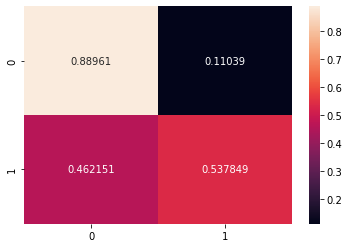

In [ ]:
y_pred_train = cv.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train, y_pred_train, normalize = 'true'), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

**Evaluar sobre el conjunto de evaluación (test)**

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       313
           1       0.45      0.48      0.47        58

    accuracy                           0.83       371
   macro avg       0.68      0.69      0.68       371
weighted avg       0.83      0.83      0.83       371



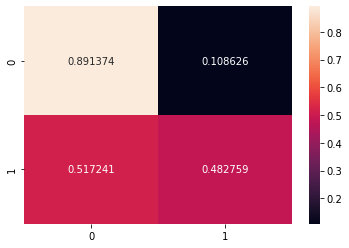

In [ ]:
y_pred = cv.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot=True, fmt='g')
print(classification_report(y_test, y_pred))

Usando como score el recall de ambas instancias, obtenemos que la mejor tasa de entrenamiento es 0,001, la mejor funcion de perdida es 'log' y la mejor penalidad es 'elasticnet'. Para efectuar esta optimización, utilizamos la opcion del SGDclassifier de balancear las clases (class_weight).

Notamos que, nuestra función de score, recall de los clientes deudores, mejoro a un 48%.





## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
clf_tree = DecisionTreeClassifier(random_state = 100)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



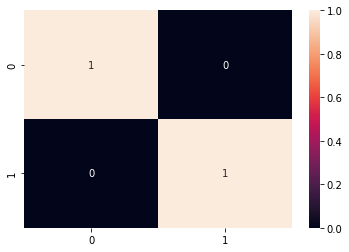

In [ ]:
y_pred_train = clf_tree.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train, normalize = 'true'), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

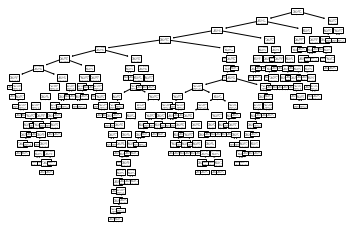

In [ ]:
from sklearn import tree
tree.plot_tree(clf_tree);

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       313
           1       0.72      0.66      0.68        58

    accuracy                           0.91       371
   macro avg       0.83      0.80      0.81       371
weighted avg       0.90      0.91      0.90       371



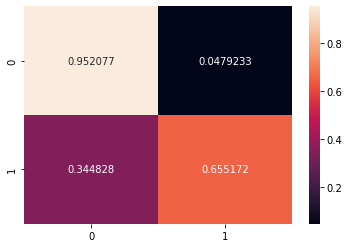

In [ ]:
y_pred = clf_tree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot= True, fmt='g')
print(classification_report(y_test, y_pred))

El argumento de profundidad máxima por default es None, que implica que el árbol aumenta profundidad hasta que todas las hojas sean puras, o hasta que la cantidad de registros en un hoja sea igual a min_sample_split. 

Es por esto que el árbol en la instancia de entrenamiento se ajusto perfectamente y no asi en el conjunto de test. Por ende se trata de un overfitting.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
model_tree = DecisionTreeClassifier(random_state = 100)


In [ ]:

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12,15]

param_grid = dict(criterion=criterion,
                  max_depth=max_depth,
                  min_samples_leaf = range(1,10),
                  min_samples_split = range(2,5),
                  class_weight= ['balanced']
                  )

Se usa para el tunning de los hiperparametros del modelo la métrica recall porque es la métrica que peor performance tiene debido a que es un dataset desbalanceado (más registros positivos que negativos)

In [ ]:
cv = GridSearchCV(model_tree, param_grid, scoring='recall', cv=5)
cv.fit(X_train, y_train)

results = cv.cv_results_
df = pd.DataFrame(results)

df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
77,0.007568,0.000141,0.002532,0.000047,balanced,gini,6,8,4,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.66,0.745098,0.82,0.70,0.709020,0.069321,1
76,0.007513,0.000079,0.002469,0.000080,balanced,gini,6,8,3,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.66,0.745098,0.82,0.70,0.709020,0.069321,1
75,0.007666,0.000142,0.002563,0.000061,balanced,gini,6,8,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.66,0.745098,0.82,0.70,0.709020,0.069321,1
79,0.007558,0.000140,0.002551,0.000126,balanced,gini,6,9,3,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.66,0.745098,0.82,0.66,0.701020,0.072151,4
78,0.007562,0.000146,0.002501,0.000084,balanced,gini,6,9,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.66,0.745098,0.82,0.66,0.701020,0.072151,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.006103,0.000193,0.002712,0.000134,balanced,entropy,2,1,3,"{'class_weight': 'balanced', 'criterion': 'ent...",0.40,0.62,0.431373,0.58,0.50,0.506275,0.084039,352
191,0.005894,0.000045,0.002534,0.000063,balanced,entropy,2,1,4,"{'class_weight': 'balanced', 'criterion': 'ent...",0.40,0.62,0.431373,0.58,0.50,0.506275,0.084039,352
192,0.006221,0.000359,0.002804,0.000160,balanced,entropy,2,2,2,"{'class_weight': 'balanced', 'criterion': 'ent...",0.40,0.62,0.431373,0.58,0.50,0.506275,0.084039,352
16,0.007856,0.000491,0.004550,0.000120,balanced,gini,2,6,3,"{'class_weight': 'balanced', 'criterion': 'gin...",0.40,0.62,0.431373,0.58,0.50,0.506275,0.084039,352


In [ ]:
cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

**Evaluar sobre el conjunto de entrenamiento (train)**

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1232
           1       0.54      0.78      0.64       251

    accuracy                           0.85      1483
   macro avg       0.74      0.82      0.77      1483
weighted avg       0.88      0.85      0.86      1483



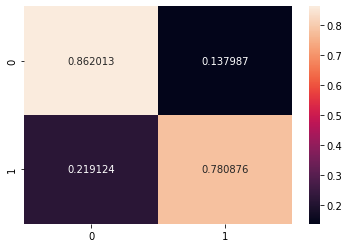

In [ ]:
y_pred_train = cv.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train, y_pred_train, normalize = 'true'), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

**Evaluar sobre el conjunto de evaluación (test)**

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       313
           1       0.43      0.74      0.54        58

    accuracy                           0.80       371
   macro avg       0.69      0.78      0.71       371
weighted avg       0.86      0.80      0.82       371



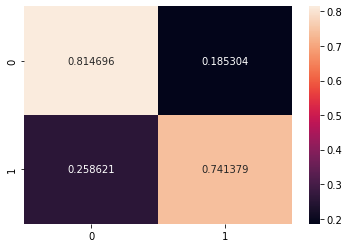

In [ ]:
y_pred = cv.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot=True, fmt='g')
print(classification_report(y_test, y_pred))



 Los hiperparametros seleccionados luego de optimizarlos utilizando un GridSearch con 5 Folds en la Cross Validation son los siguientes:
* Criterio de división (criterion): 'gini',
* Profundidad máxima del árbol: 6,
* Mínimo número de registros por hoja: 8,
* Mínimo número de registros de un nodo: 2

Para este modelo también utilizamos el hiperparametro *class_weight* como 'balanced' para balancear las clases de acuerdo a la cantidad de registros y así optimizar el recall de los clientes que son deudores.

Obtuvimos un accuracy del conjunto Train de 85% y del conjunto de Test de 80%, con lo que identificamos que no hay Overfitting.

Finalmente al obtener un **Recall** de clientes deudores (1) del **74%** en el conjunto de Test concluímos que es un modelo optimizado para el objetivo interpretado y también comparando con el SGD Classifier entrenado anteriormente.
